# **California District Housing Prices: Analysis**

## **Introduction**

The state of California has long been at the forefront of discussions surrounding housing affordability, urban development, and socio-economic disparities. With recent events highlighting the ongoing housing crisis, including soaring real estate prices and the displacement of communities, it has become increasingly crucial to develop robust tools that can assist in forecasting and managing housing trends.

## **Aim of the Project**

### ***California Median Housing Price Prediction Model by Leveraging 1990 Census Data***

Through this project, I have developed a prediction model that estimates median housing prices across California districts using data from the 1990 Census.

### ***Leveraging the power of Machine Learning***

The potential uses of this model are vast. Urban planners, policymakers, and real estate developers could employ the model to anticipate future housing demands, identify areas at risk of gentrification, and guide equitable development strategies. Additionally, by understanding how past data correlates with current trends, stakeholders can make informed decisions to mitigate the impact of rising housing costs on vulnerable populations.

<!--  -->

## **About the data**

### Data collection

Median house prices for *California districts* derived from the 1990 census.  The [dataset](https://www.kaggle.com/datasets/harrywang/housing?resource=download), derived from research by ***Pace, R. Kelley, and Ronald Barry in their 1997 paper "Sparse Spatial Autoregressions,"*** offers a historical lens through which we can understand and project housing market trends. Each observation represents a block group—a small geographical unit that serves as the foundation for building a model with significant practical applications. The block group can be defined as a district for easier interpretation.

### Feature Information

1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building

4. **totalRooms**: Total number of rooms within a block

5. **totalBedrooms**: Total number of bedrooms within a block

6. **population**: Total number of people residing within a block

7. **households**: Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue** ***(Target Variable)***: Median house value for households within a block (measured in US Dollars)

10. **oceanProximity**: Location of the house w.r.t ocean/sea. They have the following five categories: 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN' and 'ISLAND'.

## Import Useful Libraries

In [1]:
# data manipulation and numerical calculations
import pandas as pd
import numpy as np
pd.set_option('display.width', 150) # set output width for dataframes
import random as rnd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<!--  -->

## California 1990 Census Analysis

### Load data

In [2]:
# read dataset
housing_data = pd.read_csv('data/housing.csv')

In [3]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [4]:
train_df, test_df = train_test_split(housing_data, test_size=0.2, random_state= 42)

In [5]:
print(f'The training data of independent contains {train_df.shape[0]} observations and {train_df.shape[1]} variables')
print(f'The testing data contains {test_df.shape[0]} observations and {test_df.shape[1]} variables')

The training data of independent contains 16512 observations and 10 variables
The testing data contains 4128 observations and 10 variables


#### **Understanding the data**

In [6]:
print(f'The data contains {train_df.shape[0]} rows and {train_df.shape[1]} columns')

The data contains 16512 rows and 10 columns


In [7]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


> **Observations:**
> 1. Categorical Variables: *ocean_proximity* is the only variable of dtype 'object'
> 2. Numerical Variables: All other variables are numerical of dtype 'float64'

#### **Duplication Check**

In [9]:
train_df.nunique()

longitude               833
latitude                845
housing_median_age       52
total_rooms            5470
total_bedrooms         1816
population             3639
households             1706
median_income         10932
median_house_value     3675
ocean_proximity           5
dtype: int64

In [10]:
print("The Categories for ocean_proximity are:")
classes = train_df['ocean_proximity'].unique()
print(classes)

The Categories for ocean_proximity are:
['NEAR OCEAN' 'INLAND' '<1H OCEAN' 'NEAR BAY' 'ISLAND']


> **Observations:**
> * High amount of unique values for the numerical variables.
> * 5 categories for ocean_proximity

#### **Missing values Calculations**

In [11]:
train_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

> **Observation:** There are no missing values in the training data. There could be some in the testing data and should be accounted for in the preprocessing pipelines using imputation

### EDA

In [12]:
# Separate features for easier use in analysis
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']
categorical_features = ["ocean_proximity"]
target = "median_house_value"

#### Summary Statistics

In [13]:
summary = train_df.drop(columns=[target], axis=1).describe().T
summary['range'] = summary['max'] - summary['min']
summary

,count,mean,std,min,25%,50%,75%,max,range
longitude,16512.0,-119.582290,2.005654,-124.3500,-121.8100,-118.5100,-118.010000,-114.3100,10.0400
latitude,16512.0,35.643149,2.136665,32.5500,33.9300,34.2600,37.720000,41.9500,9.4000
housing_median_age,16512.0,28.608285,12.602499,1.0000,18.0000,29.0000,37.000000,52.0000,51.0000
total_rooms,16512.0,2642.004784,2174.646744,2.0000,1454.0000,2129.0000,3160.000000,39320.0000,39318.0000
total_bedrooms,16512.0,538.496851,419.007096,1.0000,296.7500,437.0000,647.000000,6445.0000,6444.0000
population,16512.0,1426.453004,1137.056380,3.0000,789.0000,1167.0000,1726.000000,35682.0000,35679.0000
households,16512.0,499.986919,380.967964,1.0000,280.0000,410.0000,606.000000,6082.0000,6081.0000
median_income,16512.0,3.880754,1.904294,0.4999,2.5667,3.5458,4.773175,15.0001,14.5002


> **Observations:**
> 
> 1. On average, the **housing_median_age** in a district is ~28 with ~12 standard deviation. There potentially might be outliers.
> 2. On average, the **total rooms** in a district are ~2.6k with high standard deviation. The range shows a huge difference between min and max as max values show ~39k shows the presence of outliers. The distibution might be right skewed.
> 3. On average, the **total bedrooms** in a district  are ~0.5k with high standard deviation. The range shows a huge difference between min and max as max values show ~5k shows the presence of outliers. The distibution might be right skewed.
> 4. On average, the **households** in a district  are ~0.5k with high standard deviation. The range shows a huge difference between min and max as max values show ~6k shows the presence of outliers. The distibution might be right skewed.
> 5. On average, the **populations** in a district  are ~1.4k with high standard deviation. The range shows a huge difference between min and max as max values show ~35k shows the presence of outliers. The distibution might be right skewed.
> 6. On average, the **median_income** in a district is ~3.8 (in 10,000 USD) with ~1.9 (in 10,000 USD) standard deviation. The range shows a huge difference between min and max as max values show ~14.5 (in 10,000 USD) shows the presence of outliers. The distibution might be right skewed.

Skewed distributions and outliers can be accomodated for modelling through the following ways:
- Remove few outliers.
- Apply log transformation for getting approximately normal distribution. Be aware of zero values in the skewed features.
- Apply scaling for reducing the influence of certain features in the prediction model.

<!--  -->

#### Univariate Analysis

##### Target Variable Analysis

median_house_value Skewness: 0.977 


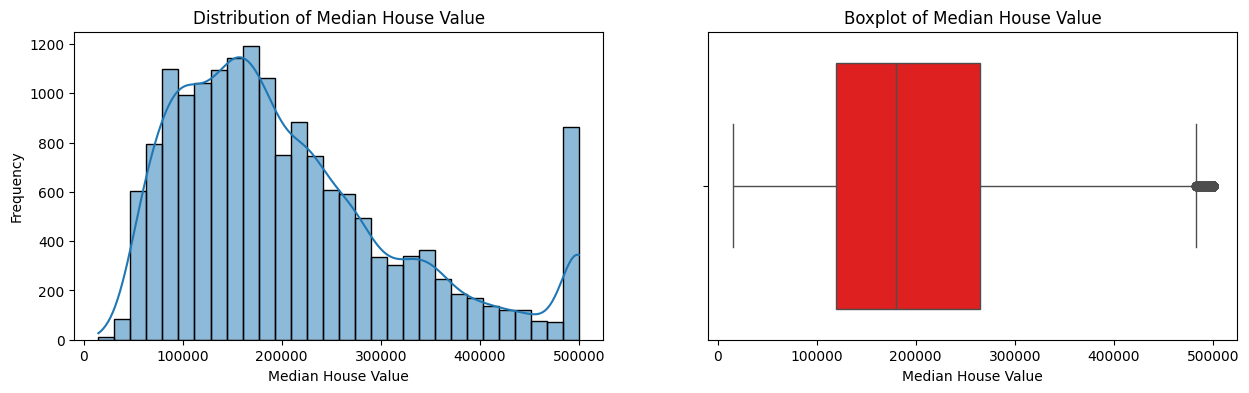

In [56]:
print(f"{target} Skewness: {round(train_df[target].skew(), 3)} ")
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.histplot(train_df[target], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df[target], color='red')
plt.title('Boxplot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

In [59]:
train_df[target].describe().T

count     16512.000000
mean     207194.693738
std      115622.626448
min       14999.000000
25%      119800.000000
50%      179850.000000
75%      265125.000000
max      500001.000000
Name: median_house_value, dtype: float64

> Observations:
> 1. The distribution is relatively normal with no skewed data.
> 2. There are over 800 districts with median house value close to 500,000 USD creating another peak. 

Increasing the performance of the model fromm the following ways:
- Either removing these values and considering them as outliers.
- Perform feature engineering for creating bins or labelling them.
- Train separate models for the outliers
- Perform log transformation to decrease the impact of the second peak on the model's performance.

<!--  -->

##### Numerical Features

In [15]:
def plot_univars(df, num_cols, nbins):
    '''
    Plots histogram and boxplot of the counts of the variables
    
    Args:
        df (Dataframe): dataframe containing the variables
        cols (List[str]): List of string of column names to be plotted
        nbins (int): The number of bins in histogram
    
    Returns: None  
    '''
    for col in num_cols:
        print(f'Measure of skewnesss for {col} : {round(df[col].skew(), 3)}') # Calculate skewness
        plt.figure(figsize = (15, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=nbins) # Histogram for univariate counts
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col]) # Boxplot for univariate counts
        
        plt.show()

Measure of skewnesss for longitude : -0.288


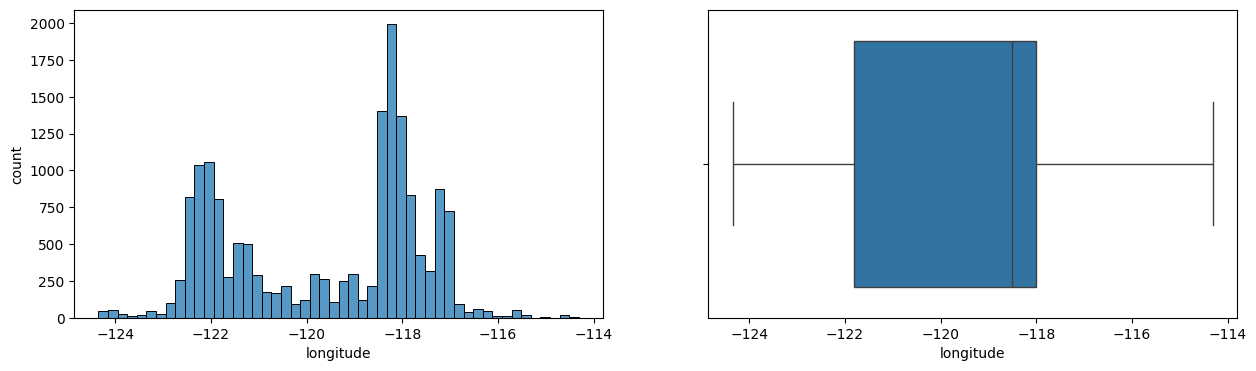

Measure of skewnesss for latitude : 0.462


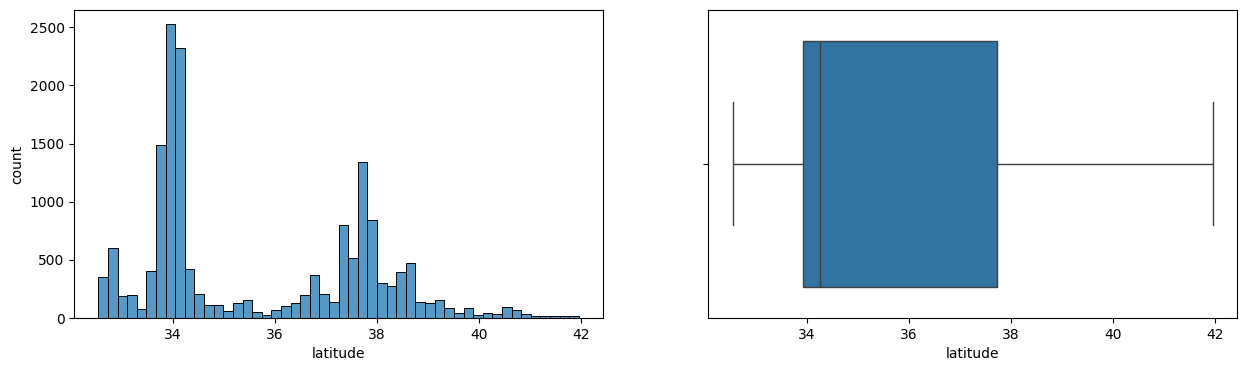

Measure of skewnesss for housing_median_age : 0.063


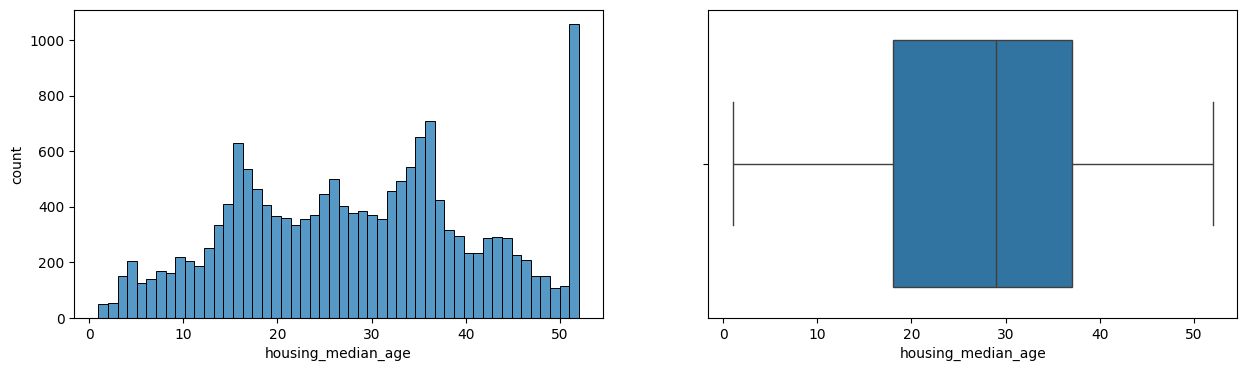

Measure of skewnesss for total_bedrooms : 3.416


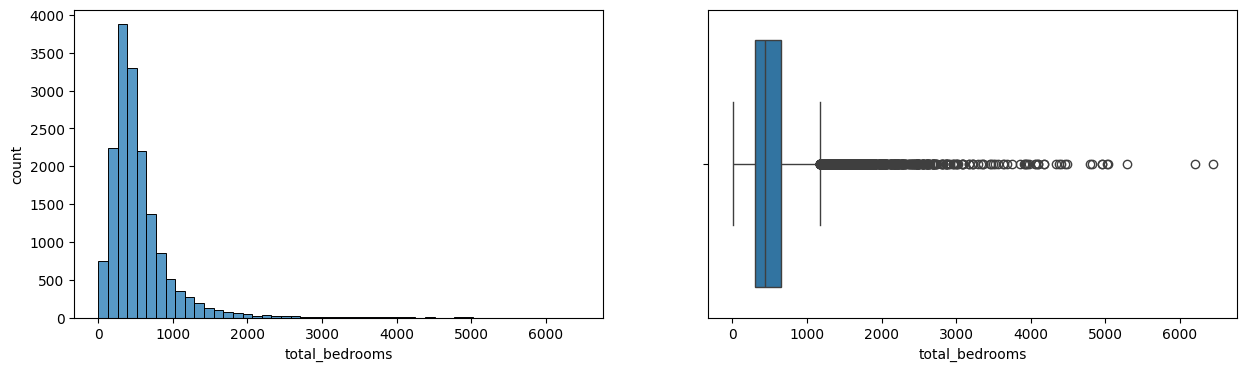

Measure of skewnesss for total_rooms : 4.091


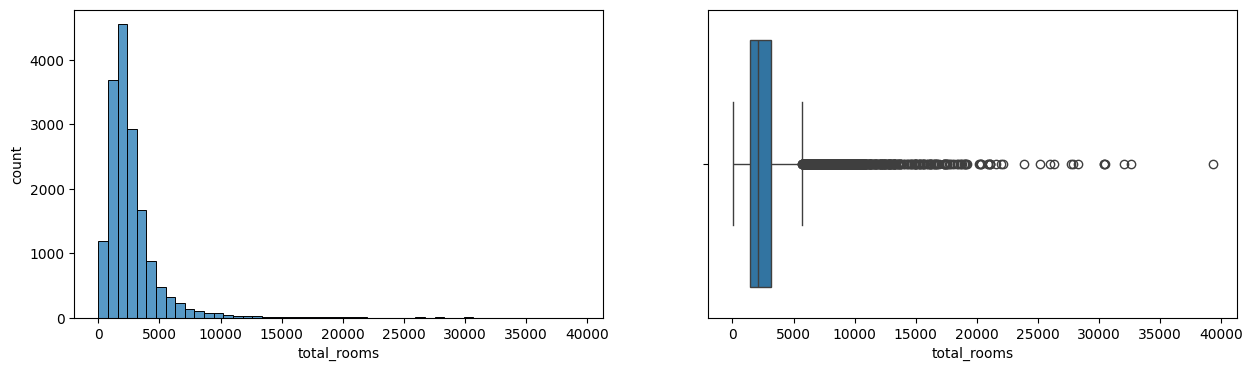

Measure of skewnesss for population : 5.276


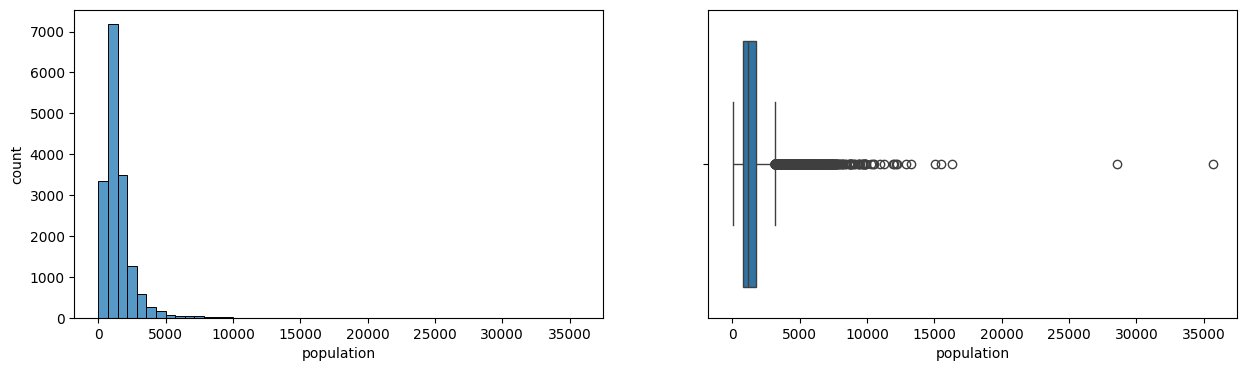

Measure of skewnesss for households : 3.387


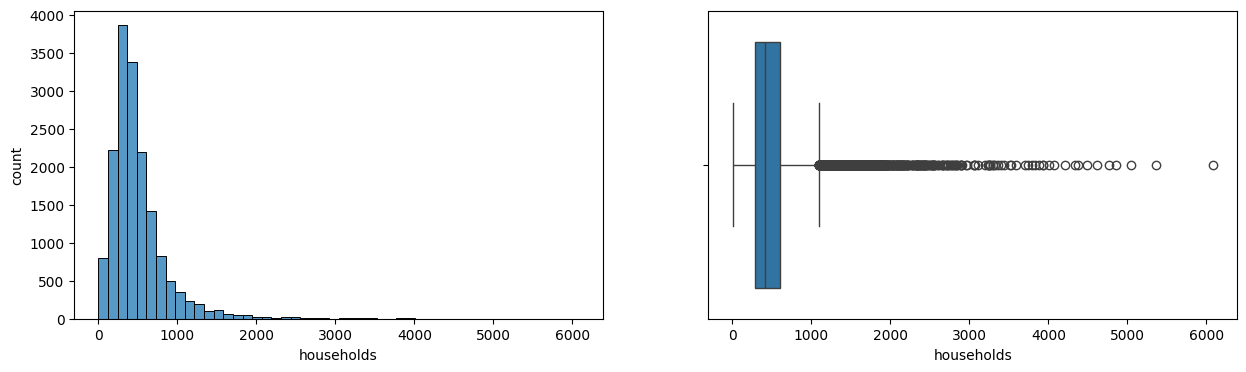

Measure of skewnesss for median_income : 1.634


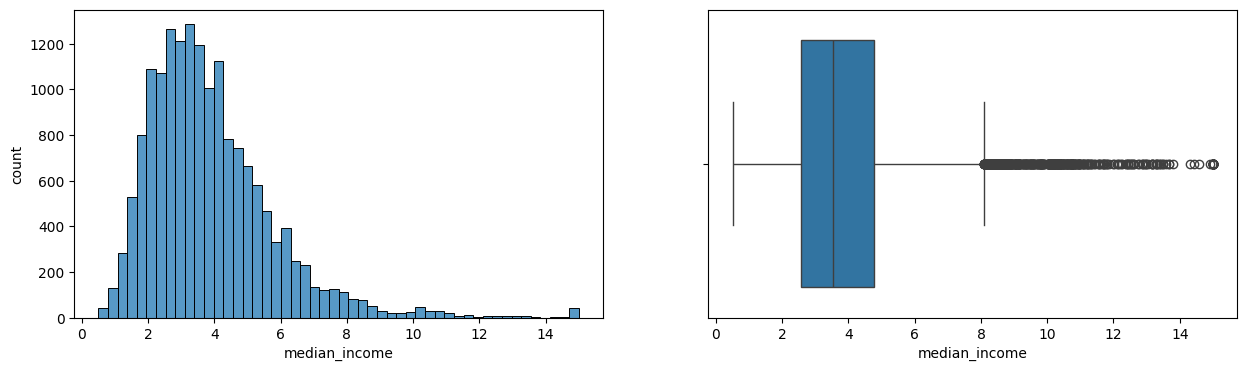

In [16]:
plot_univars(train_df, numerical_features, 50)

> **Observations:**
> 1. The distribution for **latitude** shows two peaks with no outliers. 
> 2. The distribution for **longitude** shows multiple peaks with no outliers. 
> 3. The distribution for **housing median age** also has mulitple peaks with no outliers.
> 4. The distribution for total number of **bedrooms** is right skewed with significant number of outliers.
> 5. The distribution for total number of **rooms** is right skewed with significant number of outliers.
> 6. The distribution for **population** in each district is right skewed with significant number of outliers.
> 7. The distribution for number of **households** in each district is right skewed with significant number of outliers.
> 8. The distribution for the **median income** in each district is slightly right skewed with significant number of outliers.

The multiple peaks can be resolved in the one or more of the following ways:
- Transform data using log or square root function to minimize the impact of multiple peaks.
- Converting the continous features into categorical bins or ranges.
- Clustering the values using clustering algorithms or converting into separate gaussian distributions.
- Using ensembling models for handling complex data.

The skewness can be handled by introducing log, square root or quantile transformation of the skewed distribution.

<!--  -->

##### Categorical Features

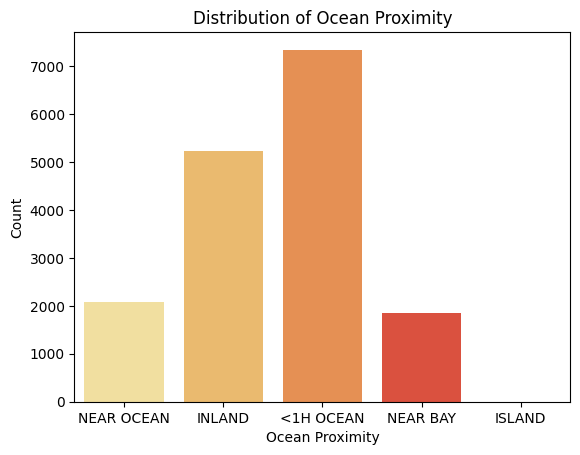

In [17]:
sns.countplot(x='ocean_proximity', data=train_df, palette='YlOrRd')
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

In [18]:
train_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7341
INLAND        5227
NEAR OCEAN    2086
NEAR BAY      1854
ISLAND           4
Name: count, dtype: int64

In [19]:
# Check the observations located on ISLANDS
train_df[train_df['ocean_proximity'] == 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND


> **Observations:**
> 1. The counts for **ocean_proximity** categorical variable follow the following descending order - ***Less than 1H OCEAN** > **INLAND** > **NEAR OCEAN** >= **NEAR BAY** > **ISLAND***
> 2. There are almost a similar number of observations for **NEAR BAY** and **NEAR OCEAN**.
> 3. **ISLAND** has a low number of observations and could impact the model by introducting noise.

<!--  -->

#### Bivariate Analysis - Interaction with Target Variable

##### Numerical Columns

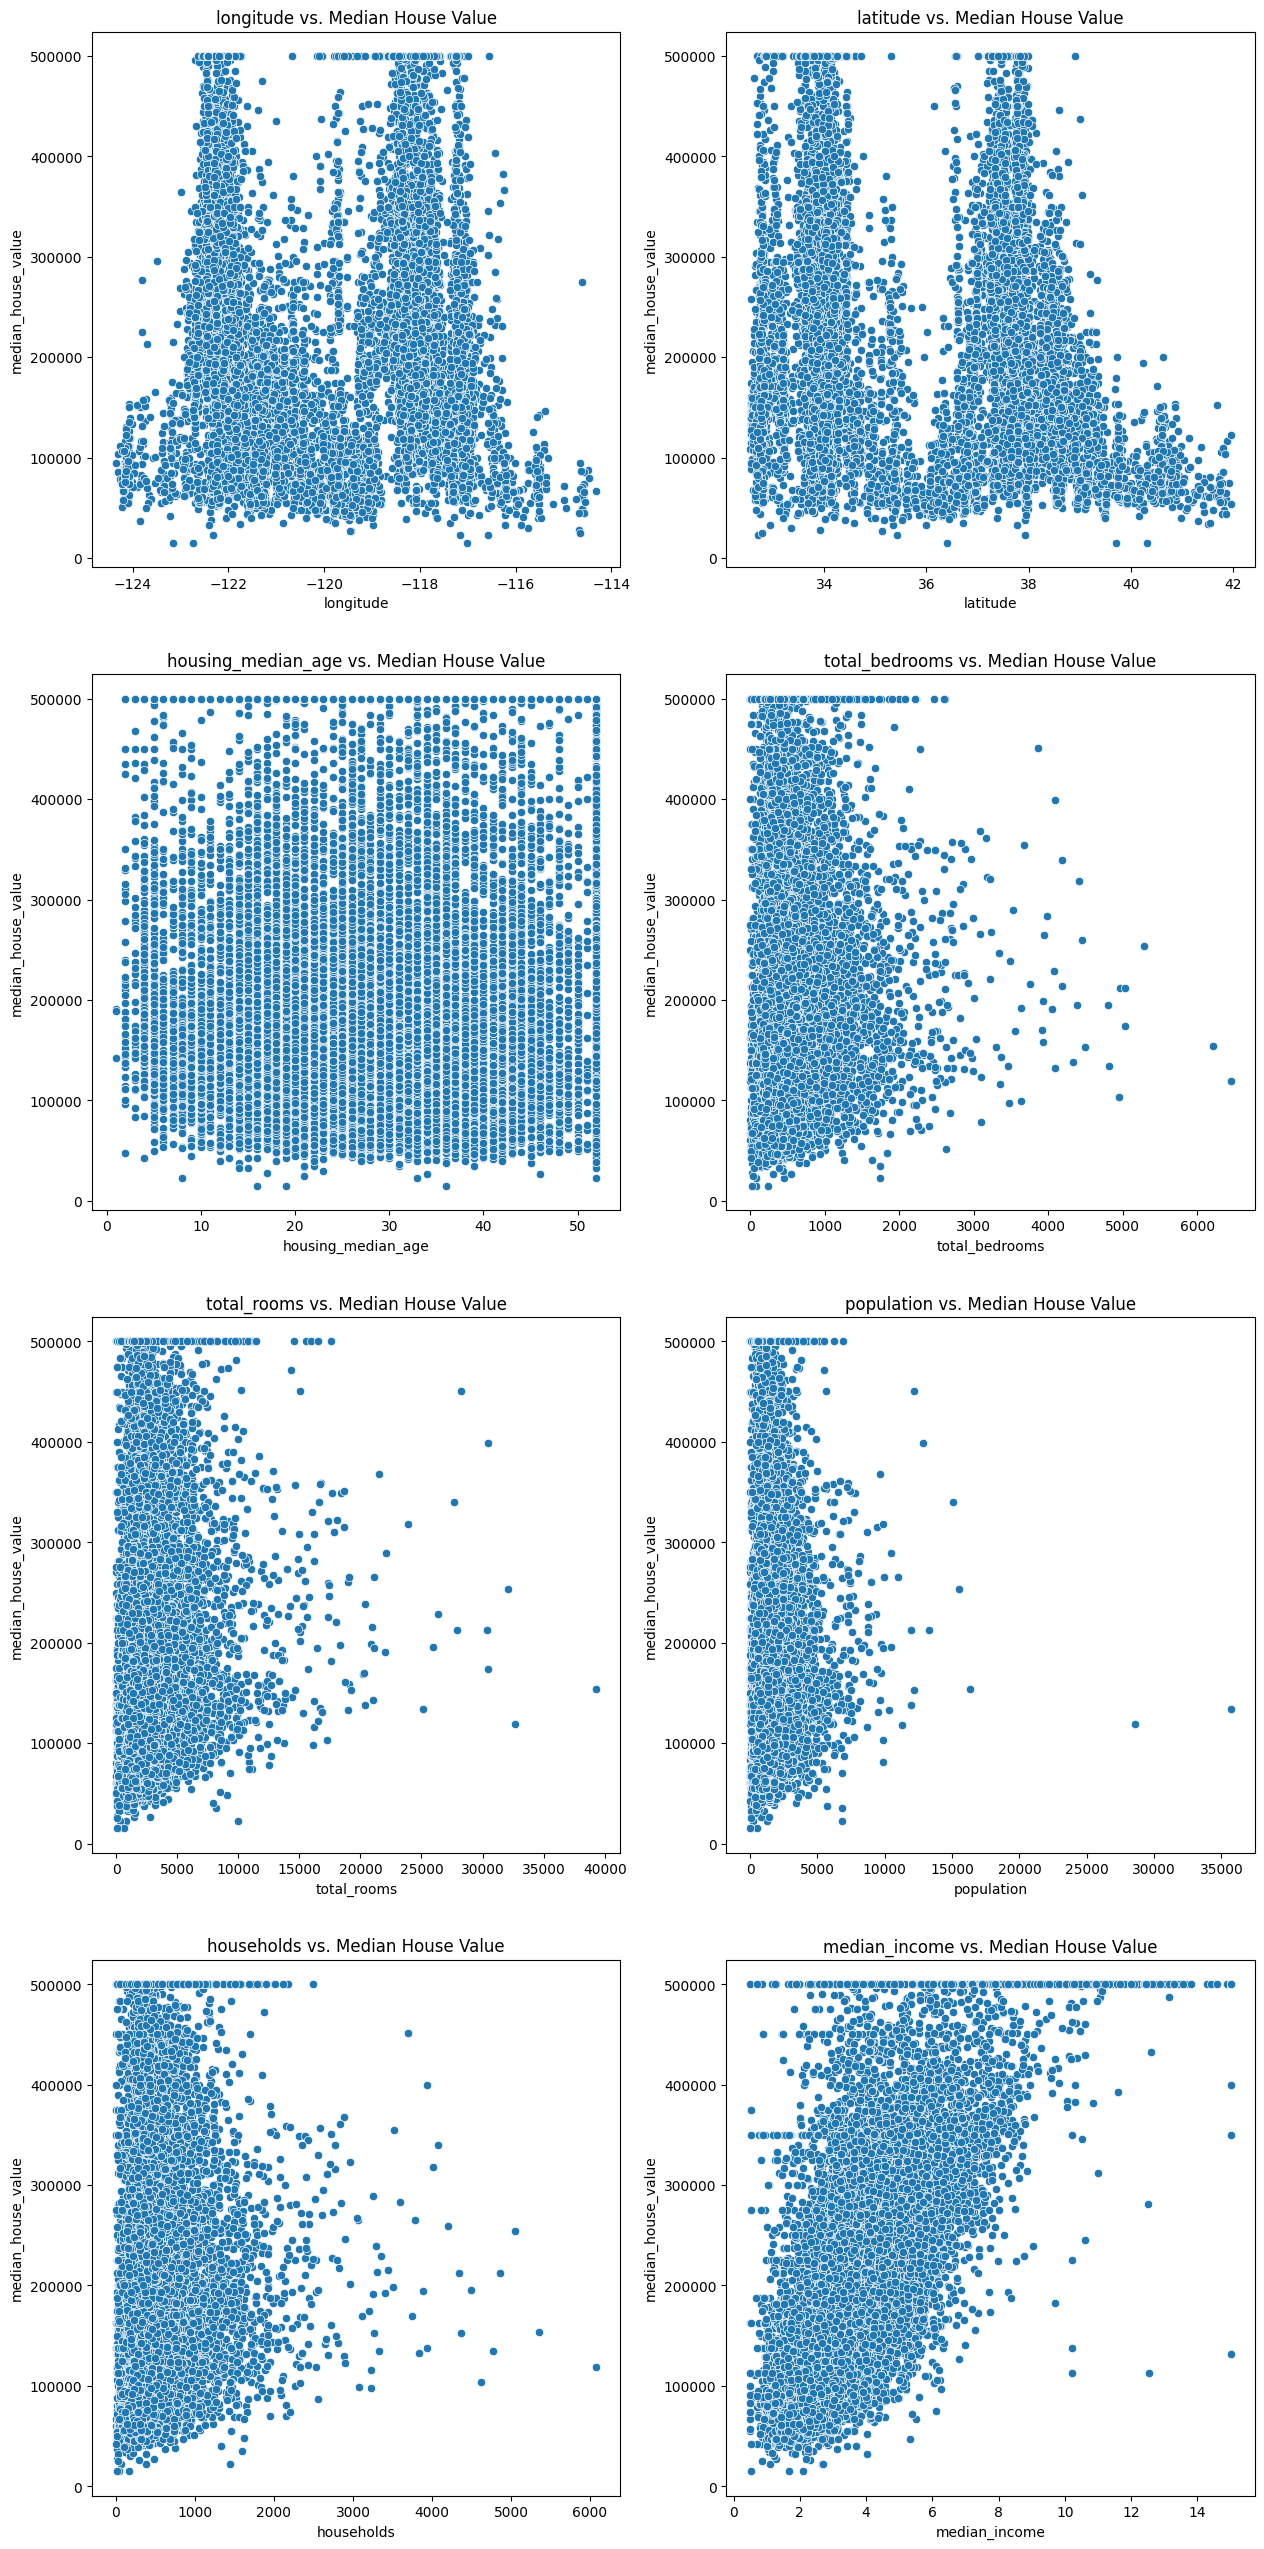

In [25]:
# Check for the relationship between the numerical columns and the target variable
plt.figure(figsize = (15, 32))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(data=train_df, x=feature, y=target)
    plt.title(f'{feature} vs. Median House Value')
plt.show()

In [21]:
corr_matrix = train_df.drop(columns=categorical_features, axis=1).corr()
corr_matrix[target]

longitude            -0.046349
latitude             -0.142983
housing_median_age    0.103706
total_rooms           0.133989
total_bedrooms        0.047980
population           -0.026032
households            0.063714
median_income         0.690647
median_house_value    1.000000
Name: median_house_value, dtype: float64

**Observations for feature relationship with target variable:**
1. There is no clear linear association with **longitude** or **latitude**. The values seem densly populated in around the values of -122 & -118 for longitude, and 34 & 38 for latitude.
2. There is no linear association with **median house age**. They seem independent to each other as the data points are uniformly distibuted all over the scatterplot.
3. The data points are densily located in the lower values for the following features - **total_bedrooms, total_rooms, households** and **population**. The values are the almost uniformly distributed over the target variable.
4. There is a positive linear association with **median income**.

Resolving non-linear relationships in one or more of the following ways:
- Removing irrelvant features using feature selection or engineer features.
- Cluster or binning the features that are densely populated at some values.
- Use ensemble models like bagging and boosting models to capture non-linear relationships
- Feature selection can be done through LASSO regression models or exhaustive selection algorithms.

<!--  -->

##### Categorical Columns

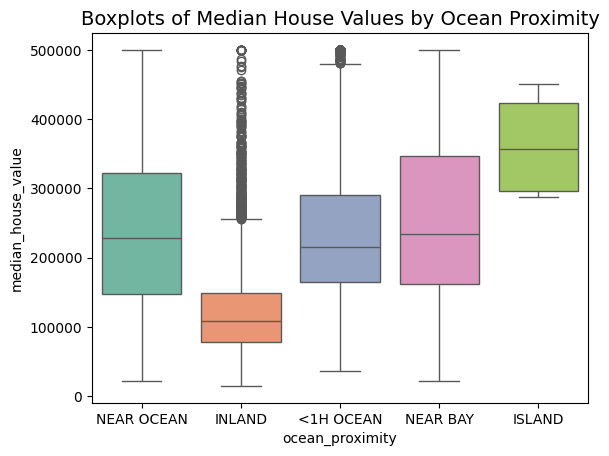

In [22]:
# Boxplots of target variable vs categorical features
sns.boxplot(x='ocean_proximity', y='median_house_value', data=train_df, palette='Set2')
plt.title('Boxplots of Median House Values by Ocean Proximity', fontsize=14)
plt.show()

> **Observations:**
> 1. The median house values increase with the proximity to the ocean.
> 2. The distributions for median house values for NEAR OCEAN and NEAR BAY are similar. Consider merging these categories to reduce model complexity.
> 3. The distribution for median house values for INLAND is right skewed with a lot of outliers.
> 4. The distribution for median house values for LESS THAN 1H OCEAN is right skewed with a lot of outliers.

Reduce the impact of the skewed data and outliers on the prediction model:
- Using ensembles techniques will handle poor predictions of the skewed values by using weak learners and apply a cost to the poorly predicted target values during model training.

<!--  -->

#### Mutivariate Analysis

##### Numerical features : Collinearity

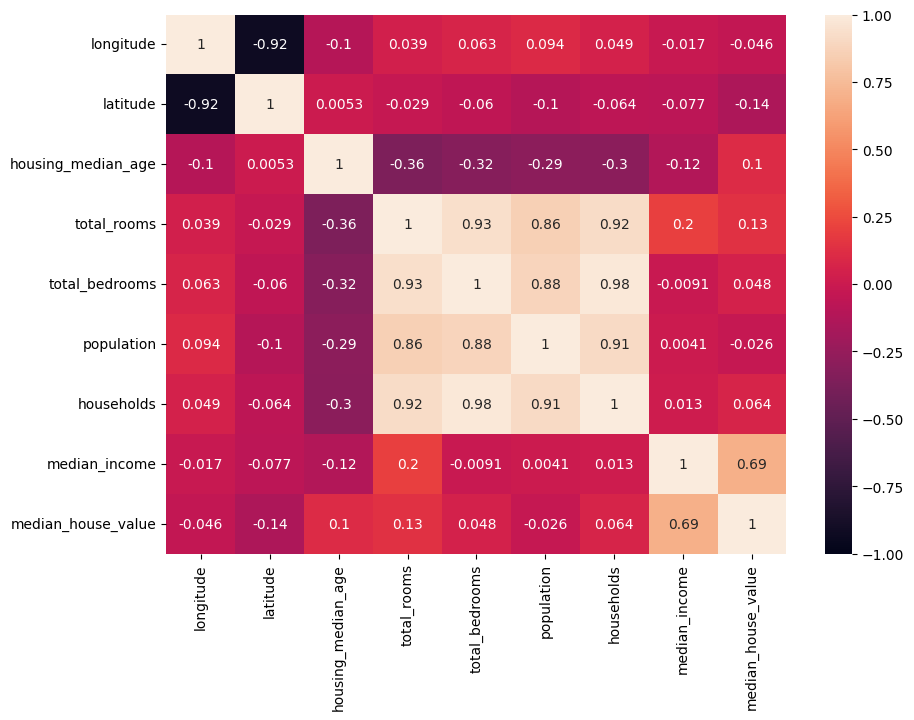

In [23]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1)
plt.show()

In [31]:
# Function to identify highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    highly_correlated = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                highly_correlated.append((corr_matrix.columns[i], corr_matrix.columns[j], round(corr_matrix.iloc[i, j], 3)))
    return highly_correlated, threshold

In [34]:
# Identify highly correlated features with a threshold
highly_correlated_features, threshold = get_highly_correlated_features(corr_matrix, threshold=0.8)
multi_collineary = pd.DataFrame(highly_correlated_features,  columns=['Feature1', 'Feature2', 'Threshold'])
print(f"Highly Correlated Features with threshold value greater than {threshold}:")
print(multi_collineary)

Highly Correlated Features with threshold value greater than 0.8:
         Feature1        Feature2  Threshold
0        latitude       longitude     -0.924
1  total_bedrooms     total_rooms      0.930
2      population     total_rooms      0.858
3      population  total_bedrooms      0.879
4      households     total_rooms      0.920
5      households  total_bedrooms      0.980
6      households      population      0.907


> **Observations:**
> 1. The above listed feature pairs are above the listed  threshold values.

The high collinearity can be resolved in the following ways:
- Feature engineering by combining the highly correleated features.
- Reducing the dimesionality of the data and transforming features into uncorrelated features through PCA.
- use Regularization techniques like LASSO or Ridge  regression to reduce the effect of highly correlated features.
- Dropping the highly correlated features or apply feature selection.

<!--  -->

##### Numerical with Categorical Features

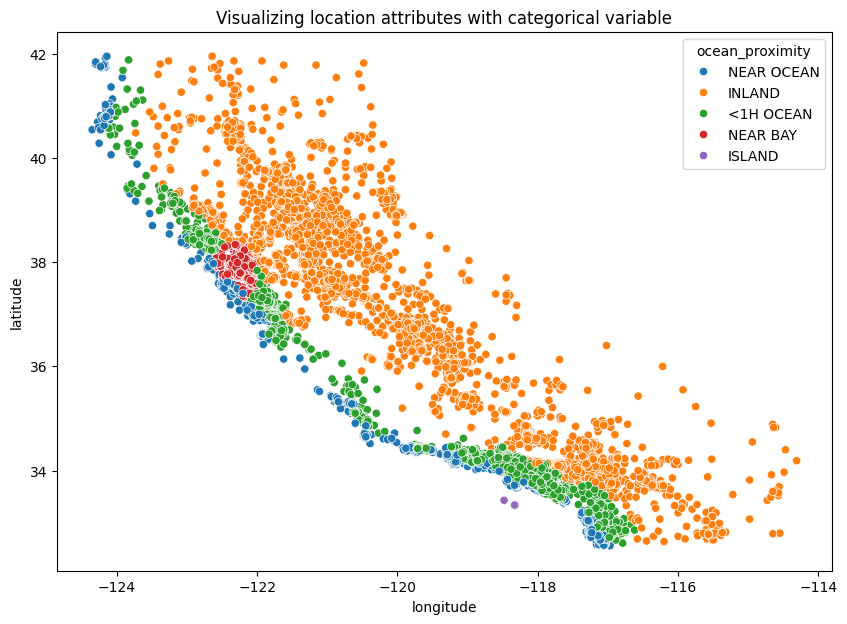

In [51]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data= train_df, x='longitude', y='latitude', hue='ocean_proximity',  palette='tab10')
plt.title('Visualizing location attributes with categorical variable')
plt.show()

**Observations:**
1. Anomalies detected in the pattern for the ISLAND category as most of them are located on the coordinates (33.4, -118.5) degrees.
2. The NEAR BAY category is localised in a single location.
3. We observe a gradual descent towards the south-west as that is where is ocean is located,

Possible adjustments or transformations to account for better model accuray:
- ISLANDS having lower number of observations can be  merged with the NEAR OCEAN category.
- NEAR BAY having observed earlier can be merged with the NEAR OCEAN category as they have the same distributions.
- NEAR BAY could also be merged with  the ISLAND category as they have similar locations when considering the proximity to the ocean. But

<!--  -->

##### Numerical with Target Variable

Text(0.5, 1.0, 'Location Attribute with Target Value')

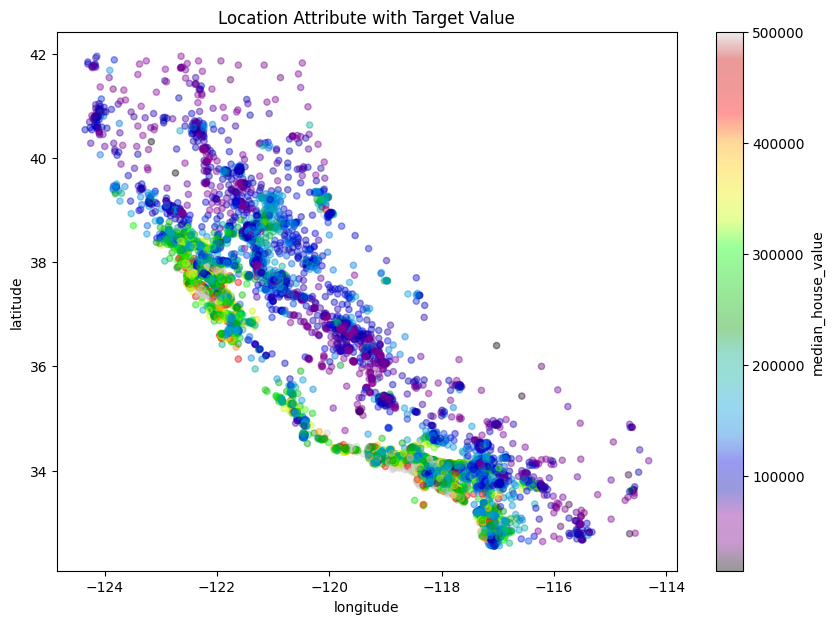

In [ ]:
train_df.plot(
    kind="scatter",
    x="longitude", y="latitude", c="median_house_value",
    alpha=0.6, colorbar=True, cmap=plt.get_cmap("nipy_spectral"),
    figsize=(10, 7),
    sharex=False,
);
plt.title('Location Attribute with Target Value')

> Observation:
> 1. Closer proximity to the ocean generally increase median house values.
> 2. Some districts have higher median house values despite the previously observed trend. This can be explained by the occurance of higher quality neighbourhoods in the californian suburbs. This creates noise in the data.

## Notebooks Next Steps...

1. Perform Feature engineering and analyze the new features.
2. Build data-preprocessing pipelines for consistent data.
3. Train Models with hyper-parameter tuning
4. Choose best model and evalue model with testing data frame.
5. Retrain the model on the whole data for deployment.